## Building a Weighted average movie Recommendation System

In [1]:
import pandas as pd
import numpy as np


credits = pd.read_csv("tmdb_5000_credits.csv")
movies_df = pd.read_csv("tmdb_5000_movies.csv")


credits.head(n=3)


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [2]:
print("Credits:",credits.shape)
print("Movies Dataframe:",movies_df.shape)

Credits: (4803, 4)
Movies Dataframe: (4803, 20)


## similary movies_df have 20 cols

###  "movie_id" of credits is mapped to "id " of movies_df  , so we will rename both to a common name and then merge both the tables 

In [9]:
credits_column_renamed = credits.rename(columns={"movie_id": "id"})
movies_df_merge = movies_df.merge(credits_column_renamed, on='id')
# movies_df_merge.head(n=1)

## Now we will drop the columns which are off no use

In [10]:
movies_cleaned_df = movies_df_merge.drop(columns=['homepage', 'title_x', 'title_y', 'status','production_countries'])
movies_cleaned_df.head(n=1)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [13]:
movies_cleaned_df.shape

(4803, 18)

### Say if only one person has watched the movie and rated that movie so we cant say anything about the movie hence we use the concept of weighted average

### Using Weighted average for each movie's  Average Rating

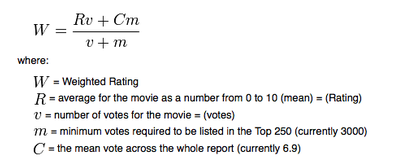


                  Source: http://trailerpark.weebly.com/imdb-rating.html?source=post_page---------------------------

In [17]:
# Calculate all the components based on the above formula

v=movies_cleaned_df['vote_count']
R=movies_cleaned_df['vote_average']
C=movies_cleaned_df['vote_average'].mean()
m=movies_cleaned_df['vote_count'].quantile(0.70)

### adding a new column weighted average to the movie

In [31]:
movies_cleaned_df['weighted_average']=((R*v)+ (C*m))/(v+m)
print(movies_cleaned_df.shape)

(4803, 19)


In [19]:
# Descending sort on the basics of weighted average

movie_sorted_ranking=movies_cleaned_df.sort_values('weighted_average',ascending=False)
movie_sorted_ranking[['original_title', 'vote_count', 'vote_average', 'weighted_average', 'popularity']].head(3)

,original_title,vote_count,vote_average,weighted_average,popularity
1881,The Shawshank Redemption,8205,8.5,8.340775,136.747729
3337,The Godfather,5893,8.4,8.192887,143.659698
662,Fight Club,9413,8.3,8.171648,146.757391


## Visulazing the plot by seaborn and matplot lib

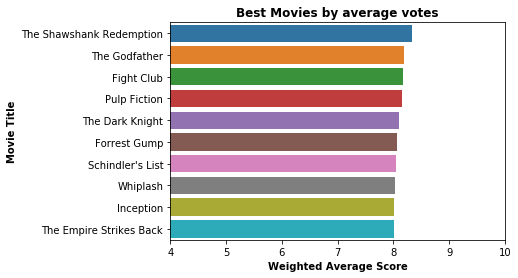

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

movie_sorted_ranking=movie_sorted_ranking.sort_values('weighted_average',ascending=False)
sns.barplot(x=movie_sorted_ranking['weighted_average'].head(10), y=movie_sorted_ranking['original_title'].head(10))


plt.xlim(4, 10)
plt.title('Best Movies by average votes', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')

plt.savefig('best_movies.png')

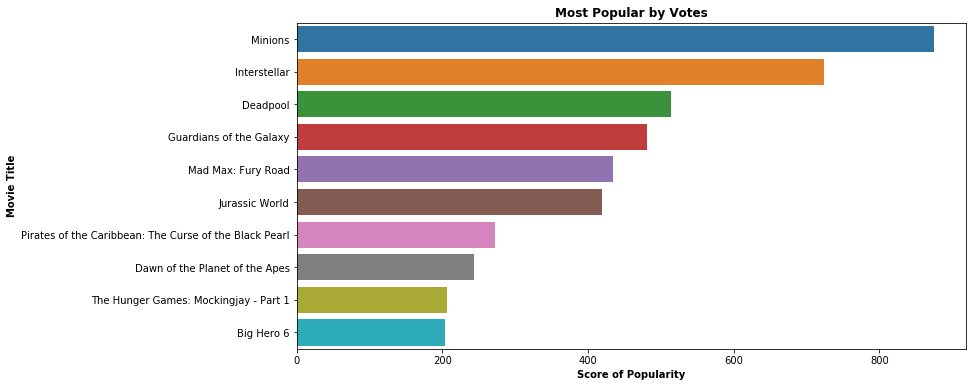

In [24]:
popularity=movie_sorted_ranking.sort_values('popularity',ascending=False)
plt.figure(figsize=(12,6))

ax=sns.barplot(x=popularity['popularity'].head(10), y=popularity['original_title'].head(10))

plt.title('Most Popular by Votes', weight='bold')
plt.xlabel('Score of Popularity', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('best_popular_movies.png')

### Now considering scaled weighted average and popularity score both for recommendation (Priority is given 50% to both)

### As both popularity and weighted average are on different scale hence to generalize we use MinMaxScaler

### Transform features by scaling each feature to a given range.

### This estimator scales and translates each feature individually such that it is in the given range on the training set

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaling=MinMaxScaler()
movie_scaled_df=scaling.fit_transform(movies_cleaned_df[['weighted_average','popularity']])
movie_normalized_df=pd.DataFrame(movie_scaled_df,columns=['weighted_average','popularity'])
movie_normalized_df.head(n=3)

,weighted_average,popularity
0,0.674339,0.171815
1,0.581403,0.158846
2,0.436273,0.122635


In [32]:
print(movies_cleaned_df.shape)
movies_cleaned_df[['normalized_weight_average','normalized_popularity']]= movie_normalized_df
print(movies_cleaned_df.shape)

(4803, 19)
(4803, 21)


In [34]:
movies_cleaned_df['score'] = movies_cleaned_df['normalized_weight_average'] * 0.5 + movies_cleaned_df['normalized_popularity'] * 0.5
print(movies_cleaned_df.shape)
movies_scored_df = movies_cleaned_df.sort_values(['score'], ascending=False)
movies_scored_df[['original_title', 'normalized_weight_average', 'normalized_popularity', 'score']].head(3)

(4803, 22)


,original_title,normalized_weight_average,normalized_popularity,score
95,Interstellar,0.906439,0.827162,0.866801
546,Minions,0.460630,1.000000,0.730315
94,Guardians of the Galaxy,0.851874,0.549462,0.700668


Text(0, 0.5, 'Movie Title')

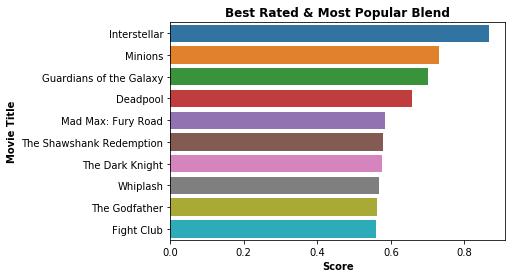

In [36]:

scored_df = movies_cleaned_df.sort_values('score', ascending=False)
sns.barplot(x=scored_df['score'].head(10), y=scored_df['original_title'].head(10))
plt.title('Best Rated & Most Popular Blend', weight='bold')
plt.xlabel('Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')
